In [117]:
import pandas as pd

In [118]:
df = pd.read_csv('UN_city_pop_projections_long.csv')

In [119]:
df

,Unnamed: 0,Region,Country_Code,Country_or_area,City_Code,City,City_Definition,Latitude,Longitude,year,population
0,0,Africa,12,Algeria,20009,Annaba,Urban Agglomeration,36.900000,7.766670,1950,99.741
1,1,Africa,12,Algeria,20011,Batna,City Proper,35.555970,6.174140,1950,13.046
2,2,Africa,12,Algeria,20015,Blida,Urban Agglomeration,36.480781,2.831943,1950,33.970
3,3,Africa,12,Algeria,20006,El Djazaïr (Algiers),Urban Agglomeration,36.752500,3.041970,1950,516.450
4,4,Africa,12,Algeria,20020,El Djelfa,Urban Agglomeration,34.672790,3.263000,1950,10.450
...,...,...,...,...,...,...,...,...,...,...,...
19001,19001,Africa,894,Zambia,23277,Lusaka,Urban Agglomeration,-15.413374,28.277148,2035,5182.669
19002,19002,Africa,894,Zambia,23279,Ndola,City Proper,-12.958670,28.636590,2035,925.726
19003,19003,Africa,716,Zimbabwe,22510,Bulawayo,City Proper,-20.150000,28.583330,2035,874.479
19004,19004,Africa,716,Zimbabwe,22511,Chitungwiza,City Proper,-18.012740,31.075550,2035,552.027


In [120]:
df.Country_or_area.unique()

array(['Algeria', 'Angola', 'Benin', 'Burkina Faso', 'Burundi',
       'Cameroon', 'Central African Republic', 'Chad', 'Congo',
       "Côte d'Ivoire", 'Democratic Republic of the Congo', 'Djibouti',
       'Egypt', 'Equatorial Guinea', 'Eritrea', 'Ethiopia', 'Gabon',
       'Gambia', 'Ghana', 'Guinea', 'Guinea-Bissau', 'Kenya', 'Liberia',
       'Libya', 'Madagascar', 'Malawi', 'Mali', 'Mauritania', 'Morocco',
       'Mozambique', 'Namibia', 'Niger', 'Nigeria', 'Rwanda', 'Senegal',
       'Sierra Leone', 'Somalia', 'South Africa', 'South Sudan', 'Sudan',
       'Togo', 'Tunisia', 'Uganda', 'United Republic of Tanzania',
       'Zambia', 'Zimbabwe'], dtype=object)

In [121]:
df = df[df['Country_or_area']=='Ethiopia']

In [122]:
df

,Unnamed: 0,Region,Country_Code,Country_or_area,City_Code,City,City_Definition,Latitude,Longitude,year,population
69,69,Africa,231,Ethiopia,20921,Addis Ababa,City Proper,9.024970,38.746890,1950,392.000
70,70,Africa,231,Ethiopia,20925,Dire Dawa,City Proper,9.593060,41.866110,1950,18.176
71,71,Africa,231,Ethiopia,20926,Gondar,City Proper,12.600000,37.466670,1950,27.900
72,72,Africa,231,Ethiopia,20929,Mekele,City Proper,13.496670,39.475280,1950,14.107
73,73,Africa,231,Ethiopia,20930,Nazret,City Proper,8.540869,39.271569,1950,14.257
...,...,...,...,...,...,...,...,...,...,...,...
18854,18854,Africa,231,Ethiopia,20921,Addis Ababa,City Proper,9.024970,38.746890,2035,8938.683
18855,18855,Africa,231,Ethiopia,20925,Dire Dawa,City Proper,9.593060,41.866110,2035,760.963
18856,18856,Africa,231,Ethiopia,20926,Gondar,City Proper,12.600000,37.466670,2035,675.651
18857,18857,Africa,231,Ethiopia,20929,Mekele,City Proper,13.496670,39.475280,2035,952.550


In [123]:
df = df.reset_index()

In [124]:
df = df.drop(columns=['index','Unnamed: 0','Region','Country_Code','City_Code','Country_or_area','City_Definition'])

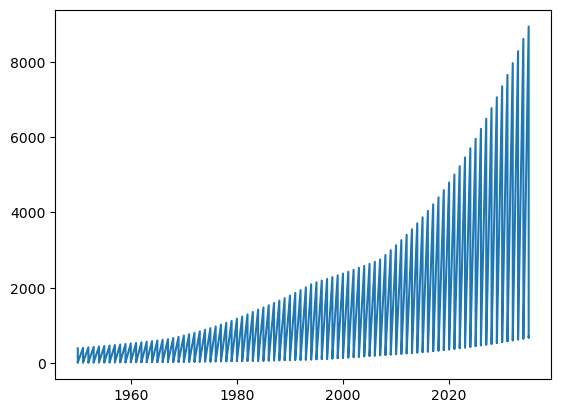

In [125]:
from matplotlib import pyplot as plt
plt.plot(df['year'],df['population'])

In [126]:
train = df[(df['year'] >= 1950) & (df['year'] < 2018)]
test = df[(df['year'] >= 2018) & (df['year'] <= 2035)]

In [127]:
x_train = train[['Latitude','Longitude','year','City']]
y_train = train[['population']]

In [128]:
x_test = test[['Latitude','Longitude','year','City']]
y_test = test[['population']]

In [129]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(340, 4)
(340, 1)
(90, 4)
(90, 1)


In [130]:
from sklearn.preprocessing import LabelEncoder
encoding  = LabelEncoder()
x_train['City'] = encoding.fit_transform(x_train[['City']])
x_test['City'] = encoding.fit_transform(x_test[['City']])

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ASUS\AppData\Local\Temp\ipykernel_16540\1267850018.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_train['City'] = encoding.fit_transform(x_train[['City']])
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ASUS\AppData\Local\Temp\ipykernel_16540

In [131]:
from sklearn.linear_model import LinearRegression,Ridge
reg = LinearRegression()

In [132]:
reg.fit(x_train,y_train)

LinearRegression()

In [133]:
predict_test = reg.predict(x_test)
predict_train = reg.predict(x_train)

In [134]:
from sklearn.metrics import mean_squared_error,r2_score

In [135]:
mean_squared_error(y_test,predict_test)

4640566.937254586

In [136]:
mean_squared_error(y_train,predict_train)

249834.7766087024

In [137]:
r2_score(y_test,predict_test)

0.22594067604049006

In [138]:
r2_score(y_train,predict_train)

0.5829150841964644

In [139]:
from sklearn.ensemble import GradientBoostingRegressor

In [140]:
gbr = GradientBoostingRegressor(learning_rate= 0.05, loss= 'huber', max_depth= 4, n_estimators= 300, subsample= 0.8)

In [141]:
gbr.fit(x_train,y_train)

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingRegressor(learning_rate=0.05, loss='huber', max_depth=4,
                          n_estimators=300, subsample=0.8)

In [142]:
prediction_train = gbr.predict(x_train)

In [143]:
prediction_test=  gbr.predict(x_test)

In [144]:
from sklearn.metrics import mean_squared_error,r2_score

In [145]:
mean_squared_error(y_train,prediction_train)

17.794486991559253

In [146]:
mean_squared_error(y_test,prediction_test)

1461438.4234179026

In [147]:
r2_score(y_train,prediction_train)

0.9999702931184786

In [148]:
r2_score(y_test,prediction_test)

0.7562280528791233

In [149]:
from sklearn.preprocessing import PolynomialFeatures


In [150]:
poly_features = PolynomialFeatures(degree=9)
X_train_poly = poly_features.fit_transform(x_train)
X_test_poly = poly_features.transform(x_test)
reg.fit(X_train_poly, y_train)

train_pred = reg.predict(X_train_poly)
test_pred = reg.predict(X_test_poly)

In [151]:
mean_squared_error(y_train,train_pred)

1303.5638214905487

In [152]:
mean_squared_error(y_test,test_pred)

372911.6800263316

In [153]:
r2_score(y_train,train_pred)

0.99782377451966

In [154]:
r2_score(y_test,test_pred)

0.93779730648416

In [155]:
y_test = y_test.values

In [156]:
pd.DataFrame(zip(y_test, test_pred),columns=['Actual', 'predicted'])

,Actual,predicted
0,[4399.674],[4129.783494591713]
1,[374.553],[410.62719786167145]
2,[332.517],[384.0427986383438]
3,[488.109],[541.2601248025894]
4,[347.737],[393.470747590065]
...,...,...
85,[8938.683],[7009.032231926918]
86,[760.963],[1328.242273926735]
87,[675.651],[1338.452491402626]
88,[952.55],[1897.0059267282486]


In [157]:
final = pd.DataFrame(zip(y_test, test_pred),columns=['Actual', 'predicted'])

In [158]:
final['Actual'] = final['Actual'].astype(str).str.replace('\[|\]', '')
final['Actual'] = pd.to_numeric(final['Actual'])
final['predicted'] = final['predicted'].astype(str).str.replace('\[|\]', '')
final['predicted'] = pd.to_numeric(final['predicted'])

C:\Users\ASUS\AppData\Local\Temp\ipykernel_16540\467468074.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  final['Actual'] = final['Actual'].astype(str).str.replace('\[|\]', '')
C:\Users\ASUS\AppData\Local\Temp\ipykernel_16540\467468074.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  final['predicted'] = final['predicted'].astype(str).str.replace('\[|\]', '')


In [159]:
final

,Actual,predicted
0,4399.674,4129.783495
1,374.553,410.627198
2,332.517,384.042799
3,488.109,541.260125
4,347.737,393.470748
...,...,...
85,8938.683,7009.032232
86,760.963,1328.242274
87,675.651,1338.452491
88,952.550,1897.005927
